In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from matplotlib.colors import ListedColormap
import pandas as pd

# KNN Concepts

---



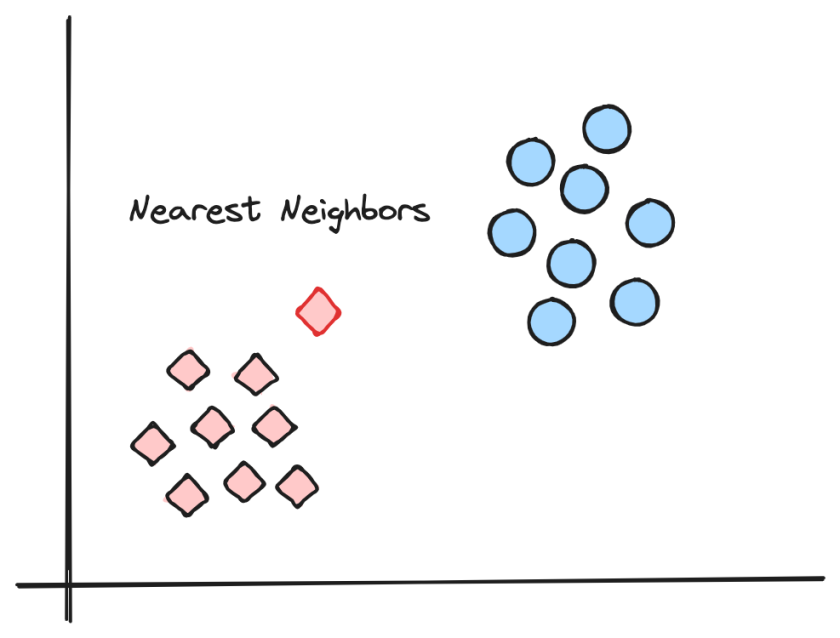

## Euclidean Distance

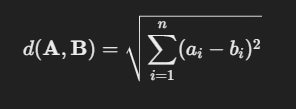

# Version 1: from scratch

In [ ]:
# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# KNN Classifier
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _predict(self, x):
        # Compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common()  # returns a list of tuples, where each tuple contains: a label and its count
        return most_common[0][0]  #Extracts the label (not the count) from this tuple.

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)



In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target column
df['target'] = iris.target

# Display the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Train the KNN model
clf = KNN(k=5)
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate accuracy
acc = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", acc)

Accuracy: 0.9666666666666667


<ipython-input-40-3921517d6b64>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


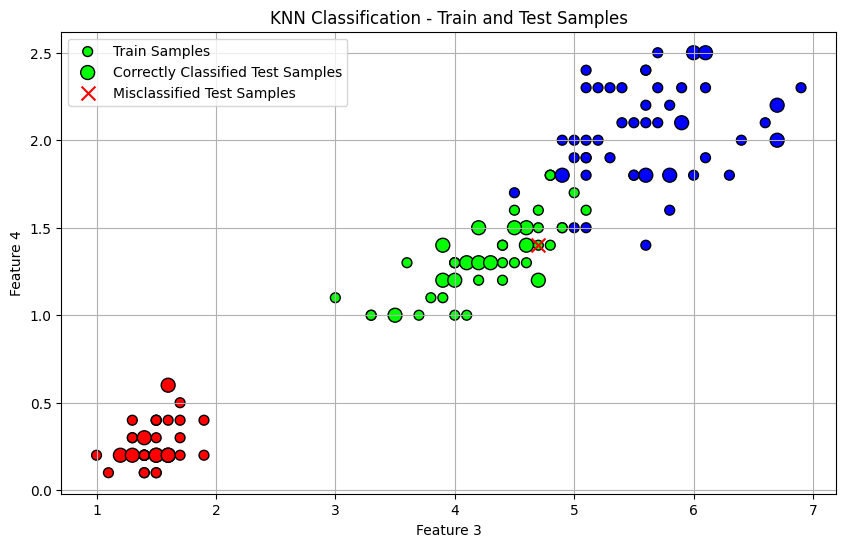

In [ ]:

# Prepare for visualization
plt.figure(figsize=(10, 6))


# Color map
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot training samples
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cmap, edgecolor='k', label='Train Samples', s=50)

# Plot test samples (correctly classified)
correct_mask = predictions == y_test
plt.scatter(
    X_test[correct_mask, 2],
    X_test[correct_mask, 3],
    c=y_test[correct_mask],
    cmap=cmap,
    edgecolor='k',
    marker='o',
    label='Correctly Classified Test Samples',
    s=100,
)

# Plot misclassified test samples
plt.scatter(
    X_test[~correct_mask, 2],
    X_test[~correct_mask, 3],
    c=y_test[~correct_mask],
    cmap=cmap,
    edgecolor='k',
    marker='x',
    label='Misclassified Test Samples',
    s=100,
)

# Add plot details
plt.xlabel("Feature 3")
plt.ylabel("Feature 4")
plt.title("KNN Classification - Train and Test Samples")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Find misclassified samples
misclassified_mask = predictions != y_test  # Boolean mask for misclassified samples
misclassified_samples = X_test[misclassified_mask]  # Extract misclassified samples
true_labels = y_test[misclassified_mask]  # True labels of misclassified samples
predicted_labels = predictions[misclassified_mask]  # Predicted labels for misclassified samples

print("Misclassified Samples:")
print("Features:\n", misclassified_samples)
print("True Labels:", true_labels)
print("Predicted Labels:", predicted_labels)


Misclassified Samples:
Features:
 [[6.1 2.9 4.7 1.4]]
True Labels: [1]
Predicted Labels: [2]


# Version 2: using library

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Use only the first two features for visualization

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# Create and train the KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.38      0.53        13
           2       0.47      0.88      0.61         8

    accuracy                           0.70        30
   macro avg       0.77      0.75      0.71        30
weighted avg       0.79      0.70      0.69        30



<ipython-input-45-1dbd58e67a63>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', s=100, label='Test')


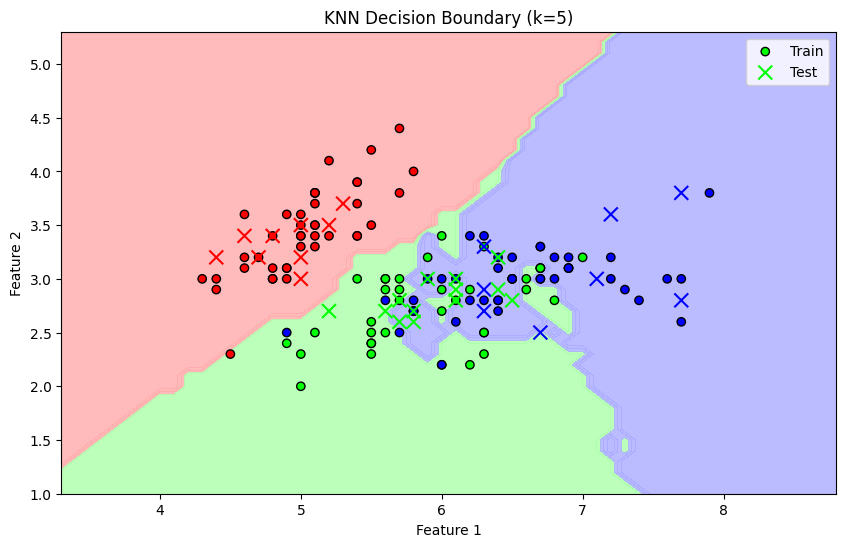

In [ ]:

# Visualization
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', marker='x', s=100, label='Test')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.legend()
plt.show()


# Analyzing the impact of k

In [ ]:
def get_accuracy_for_ks(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

k=1, Accuracy=0.6667
k=2, Accuracy=0.6667
k=3, Accuracy=0.7333
k=4, Accuracy=0.7333
k=5, Accuracy=0.7000
k=6, Accuracy=0.8333
k=7, Accuracy=0.7667
k=8, Accuracy=0.8667
k=9, Accuracy=0.7000
k=10, Accuracy=0.7667
k=11, Accuracy=0.7667
k=12, Accuracy=0.8333
k=13, Accuracy=0.8000
k=14, Accuracy=0.8000
k=15, Accuracy=0.8000
k=16, Accuracy=0.8000
k=17, Accuracy=0.8000
k=18, Accuracy=0.8000
k=19, Accuracy=0.8000
k=20, Accuracy=0.8000


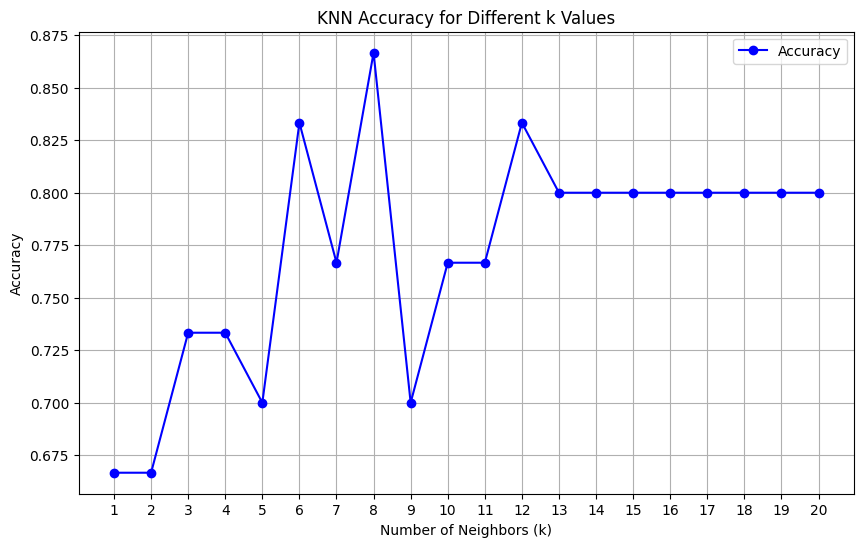

In [ ]:
import matplotlib.pyplot as plt

# Define a range of k values
k_values = range(1, 21)  # Test k from 1 to 20
accuracies = []

# Compute accuracy for each k
for k in k_values:
    acc = get_accuracy_for_ks(k)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)  # Show all k values on the x-axis
plt.grid()
plt.legend()
plt.show()


# References

[machine learning from scratch](https://github.com/AssemblyAI-Community/Machine-Learning-From-Scratch/tree/main/01%20KNN)